# Prepare Data

# Import

### Libraries

In [1]:
import warnings   # to get ride of future warning

import pandas as pd  # data wrangling

import numpy as np  # mathematics

import matplotlib.pyplot as plt  # Visualisation
import seaborn as sns   # Visualisation
import plotly.express as px  # Visualisation
import plotly.graph_objects as go   # Visualisation

from sklearn.model_selection import train_test_split  # data split
from sklearn.impute import SimpleImputer               # Imputation / Transformer
from category_encoders import OneHotEncoder , OrdinalEncoder  # For Encoding / Transformer

from sklearn.pipeline import Pipeline, make_pipeline    # help in steps to be mentain

from sklearn.linear_model import LogisticRegression    # Model 1 building
from sklearn.tree import DecisionTreeClassifier,plot_tree # Model 2 builiding
from sklearn.ensemble import RandomForestClassifier # Model # building

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split


from sklearn.metrics import mean_absolute_error        # To Evaluate our model prediction 
from sklearn.metrics import accuracy_score   # To check Model accuracy score.

warnings.simplefilter(action="ignore",category=FutureWarning) # to get ride of future warning

### Data Frame

In [156]:
def wrangle(filename):
    
    # Importing Data as Data Frame
    df = pd.read_excel(filename, index_col="STUDENT IDENTIFIER").sort_index()
    
    
    #Create a new feature called attrition from the RETURNED_2ND_YR
    df['Attrition']=df['RETURNED_2ND_YR']

    #dropping RETURNED_2ND_YR
    df.drop('RETURNED_2ND_YR',axis=1,inplace=True)
    
    #swapping 1&0 in Attrition, so 1 represents students who discontinued
    df['Attrition']=df['Attrition'].apply(lambda x: 0 if x == 1 else 1)
    
    # Drop Column Having more than 50% values as NaN.
    df = df.drop(columns= ["CORE_COURSE_NAME_5_F",
                           "CORE_COURSE_GRADE_5_F",
                           "CORE_COURSE_GRADE_5_F",
                           "CORE_COURSE_NAME_6_F",
                           "CORE_COURSE_GRADE_6_F",
                           "CORE_COURSE_NAME_4_S",
                           "CORE_COURSE_GRADE_4_S",
                           "CORE_COURSE_NAME_5_S",
                           "CORE_COURSE_GRADE_5_S",
                           "CORE_COURSE_NAME_6_S",
                           "CORE_COURSE_GRADE_6_S"
                          ])
    
    # Drop Column looks not having much use in model prediction.
    df = df.drop(columns= ["CORE_COURSE_GRADE_1_F",
                           "CORE_COURSE_GRADE_2_F",
                           "CORE_COURSE_GRADE_3_F",
                           "CORE_COURSE_GRADE_4_F",
                           "CORE_COURSE_GRADE_1_S",
                           "CORE_COURSE_GRADE_2_S",
                           "CORE_COURSE_GRADE_3_S"
                          ])
    
    
    # Drop "STDNT_MINOR" Column as have 92% student have no minor subject
    df = df.drop(columns = ["STDNT_MINOR"])
    
    # Drop Column with High Cardinality
    df = df.drop(columns = ["HIGH_SCHL_NAME",
                            "FATHER_HI_EDU_CD",
                            "MOTHER_HI_EDU_CD",
                            "CORE_COURSE_NAME_1_S",
                            "CORE_COURSE_NAME_4_F",
                            "CORE_COURSE_NAME_3_S",
                            "CORE_COURSE_NAME_1_F",
                            "CORE_COURSE_NAME_2_S",
                            "CORE_COURSE_NAME_2_F",
                            "CORE_COURSE_NAME_3_F"
                           ])
    
    # Drop Column with Multicolinearity
    
    df = df.drop(columns = ["FATHER_HI_EDU_DESC",
                            "MOTHER_HI_EDU_DESC",
                            "DEGREE_GROUP_DESC",
                            "STDNT_TEST_ENTRANCE1",
                            "STDNT_TEST_ENTRANCE2",
                            "GROSS_FIN_NEED",
                            "FIRST_TERM",
                            "SECOND_TERM_ATTEMPT_HRS"
                           ])

    
    return df

In [157]:
df = wrangle("Student Applications & Performance.xlsx")

In [11]:
# df = pd.read_excel("Student Applications & Performance.xlsx")

In [12]:
df.shape

(3400, 56)

In [13]:
df.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   int64  
 1   STDNT_AGE                 3400 non-null   int64  
 2   STDNT_GENDER              3400 non-null   object 
 3   STDNT_BACKGROUND          3400 non-null   object 
 4   IN_STATE_FLAG             3400 non-null   object 
 5   INTERNATIONAL_STS         3400 non-null   object 
 6   STDNT_MAJOR               3400 non-null   object 
 7   STDNT_MINOR               3400 non-null   object 
 8   STDNT_TEST_ENTRANCE1      1106 non-null   float64
 9   STDNT_TEST_ENTRANCE2      2492 non-null   float64
 10  STDNT_TEST_ENTRANCE_COMB  2882 non-null   float64
 11  FIRST_TERM                3400 non-null   int64  
 12  CORE_COURSE_NAME_1_F      3400 non-null   object 
 13  CORE_COURSE_GRADE_1_F     3400 non-null   object 
 14  CORE_COU

In [107]:
df.Attrition.unique()

array([0, 1], dtype=int64)

# EDA

#### 1. STUDENT IDENTIFIER

In [18]:
# checking number of unique values in student identifier.

df["STUDENT IDENTIFIER"].nunique()

3400

##### Conclusion : 

Marked this column as Index as Column as all the value are unique.

#### 2. Finding % of NaN values

In [98]:
df.isna().sum() / len(df)

STUDENT IDENTIFIER          0.000000
STDNT_AGE                   0.000000
STDNT_GENDER                0.000000
STDNT_BACKGROUND            0.000000
IN_STATE_FLAG               0.000000
INTERNATIONAL_STS           0.000000
STDNT_MAJOR                 0.000000
STDNT_MINOR                 0.000000
STDNT_TEST_ENTRANCE1        0.674706
STDNT_TEST_ENTRANCE2        0.267059
STDNT_TEST_ENTRANCE_COMB    0.152353
FIRST_TERM                  0.000000
CORE_COURSE_NAME_1_F        0.000000
CORE_COURSE_GRADE_1_F       0.000000
CORE_COURSE_NAME_2_F        0.029118
CORE_COURSE_GRADE_2_F       0.029118
CORE_COURSE_NAME_3_F        0.166176
CORE_COURSE_GRADE_3_F       0.166176
CORE_COURSE_NAME_4_F        0.469706
CORE_COURSE_GRADE_4_F       0.469706
CORE_COURSE_NAME_5_F        0.810294
CORE_COURSE_GRADE_5_F       0.810294
CORE_COURSE_NAME_6_F        0.962353
CORE_COURSE_GRADE_6_F       0.962353
SECOND_TERM                 0.000000
CORE_COURSE_NAME_1_S        0.046176
CORE_COURSE_GRADE_1_S       0.068235
C

##### Conclusion : 

Remove all column / features having NaN in more then 50 % of the data. 

#### 3. STDNT_AGE

In [70]:
df.STDNT_AGE.isna().sum()

0

In [59]:
df.STDNT_AGE.value_counts().sort_index()

16       8
17     309
18    2860
19     190
20      14
21       7
22       4
23       3
24       1
25       3
26       1
Name: STDNT_AGE, dtype: int64

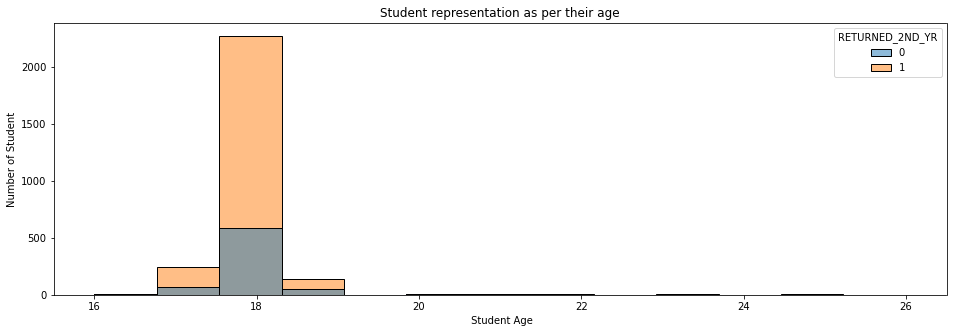

In [68]:
# plt.subplot(1,2,2)
# sns.histplot(data=pr, x='STDNT_AGE', hue='Attrition', binwidth=1,color=[ 'lightskyblue', 'orange'])
# plt.xticks(ticks=np.arange(16.5,27.5,1) , labels=np.arange(16,27))
# plt.title('Count of Age group w.r.t Attrition')
# plt.show()


plt.figure(figsize=(16,5))
sns.histplot(data = df, x = "STDNT_AGE", hue = "RETURNED_2ND_YR"),
plt.xlabel(" Student Age")
plt.ylabel("Number of Student")
plt.title("Student representation as per their age")
plt.show()

##### Conclusion : 

As per student representation by their age it's looking higest no# Student belong to age 18.
There is no null value as well.
So, in this feature we need not to make any changes.

#### 4. STDNT_GENDER

In [71]:
df.STDNT_GENDER.value_counts()

F    2140
M    1260
Name: STDNT_GENDER, dtype: int64

In [72]:
FS = df[(df["STDNT_GENDER"] == "F")]
MS = df[(df["STDNT_GENDER"] == "M")]

In [73]:
FS

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0
6,7838856,18,F,BGD 1,Y,N,Biology,N,NaN,580.0,...,B,Bachelors,16,16,15.0,15.0,0,0,0,0.0
7,7960448,18,F,BGD 1,Y,N,Biology,N,NaN,750.0,...,B,Bachelors,16,16,15.0,15.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,7960053,18,F,BGD 1,Y,N,Theatre Arts,N,NaN,1010.0,...,B,Bachelors,13,3,NaN,NaN,0,0,0,0.0
3395,7948112,18,F,BGD 4,N,N,Music Performance,N,NaN,800.0,...,B,Bachelors,18,18,16.0,13.0,0,0,0,0.0
3396,8023055,18,F,BGD 1,Y,N,Biology,N,20.0,NaN,...,B,Bachelors,13,9,NaN,NaN,0,0,0,0.0
3397,7926915,18,F,BGD 4,Y,N,Biology,N,NaN,1020.0,...,B,Bachelors,14,6,NaN,NaN,0,945840,1288980,0.0


In [74]:
FS.Attrition.value_counts(normalize=True)

1    0.778037
0    0.221963
Name: RETURNED_2ND_YR, dtype: float64

In [75]:
MS.Attrition.value_counts(normalize=True)

1    0.803175
0    0.196825
Name: RETURNED_2ND_YR, dtype: float64

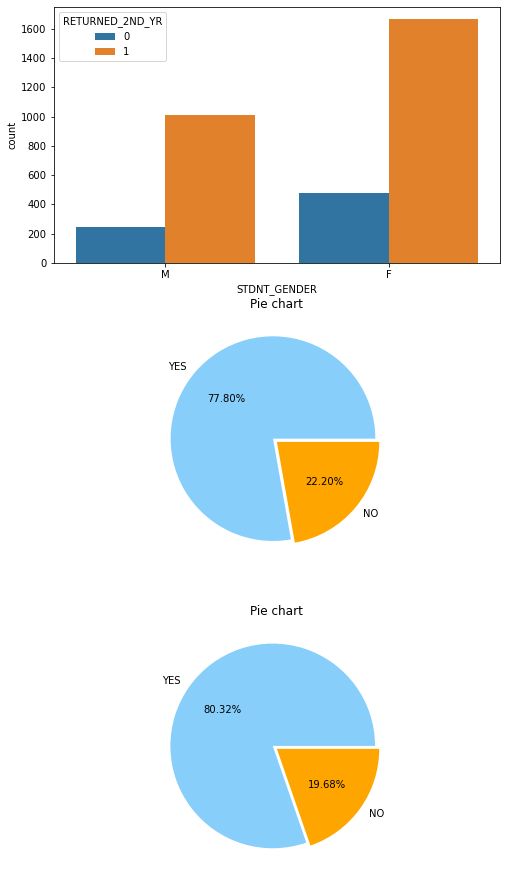

In [357]:
plt.figure(figsize=(8,16))

plt.subplot(3,1,1)
sns.countplot(df['STDNT_GENDER'],hue=df['Attrition'])

plt.subplot(3,1,2)
plt.pie(FS['Attrition'].value_counts(),explode=[0.05,0], colors=[ 'lightskyblue', 'orange'], labels=['YES', 'NO'], autopct='%.2f%%')
plt.title('Pie chart')

plt.subplot(3,1,3)
plt.pie(MS['Attrition'].value_counts(),explode=[0.05,0], colors=[ 'lightskyblue', 'orange'], labels=['YES', 'NO'], autopct='%.2f%%')
plt.title('Pie chart')
plt.show()

##### Conclusion : 
It seems like Gender Column dose not really matter for taking admission in 2nd year as it representation of male & female remain more or less same. 

So, it is upto us we want to drop it or not. 

Here, I am keeping as it is not going to effect in wrong way.

#### 5. STDNT_BACKGROUND

In [94]:
df.STDNT_BACKGROUND.value_counts()

BGD 1    2082
BGD 3     947
BGD 4     139
BGD 2     106
BGD 6      94
BGD 7      19
BGD 5       8
BGD 8       5
Name: STDNT_BACKGROUND, dtype: int64

In [95]:
df.STDNT_BACKGROUND.isna().sum()

0

##### Conclusion : 

Here, in "STDNT_BACKGROUND" column there is no null value and 8 different values. 

So, don't find any reason to make any changes with it.

#### 6. INTERNATIONAL_STS

In [170]:
df.INTERNATIONAL_STS.value_counts()

N    3373
Y      27
Name: INTERNATIONAL_STS, dtype: int64

In [19]:
# Indicator of whether Student is an International Student

df.INTERNATIONAL_STS.value_counts(normalize=True)

N    0.992059
Y    0.007941
Name: INTERNATIONAL_STS, dtype: float64

##### Conclusion : 



#### 7. STDNT_MINOR

In [131]:
# Indicator of whether Student is an International Student

df.STDNT_MINOR.value_counts(normalize=True)

N                                0.929412
Spanish                          0.007647
Music                            0.005588
Psychology                       0.005588
Foundations of Business          0.004412
Communication                    0.004118
History                          0.003824
Theatre Arts                     0.003529
Criminal Justice                 0.003529
Computer Science - Systems       0.002941
Early Childhood Education        0.002647
Mathematics                      0.002059
Marketing                        0.001765
Art History                      0.001765
Professional Writing             0.001765
Art                              0.001471
Sociology                        0.001471
English Language/Literature      0.001471
Biology                          0.001176
Chemistry                        0.001176
Political Science                0.001176
Accounting                       0.001176
French                           0.001176
Economics                        0

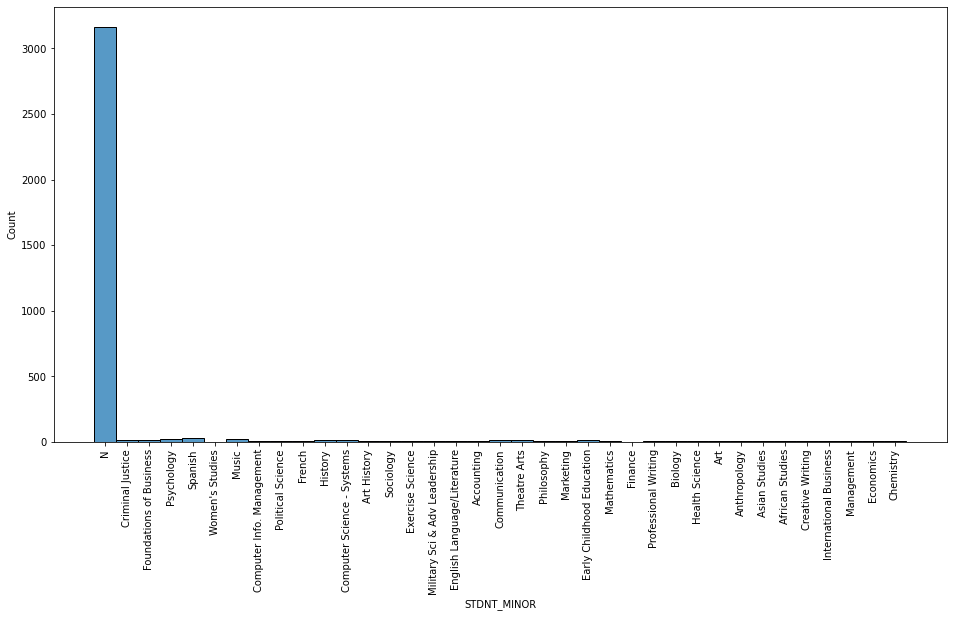

In [132]:
plt.figure(figsize=(16,8))
sns.histplot(df['STDNT_MINOR'])
plt.xticks(rotation = 90)
plt.show()

##### Conclusion : 

Looking at this data I come to a conclusion that I can drop this column because more than 90% of the student do not have any Minor Subject.

#### 8. STDNT_MAJOR

In [104]:
# Indicator of whether Student is an International Student

df.STDNT_MAJOR.value_counts(normalize=True)

Undeclared                        0.135294
Biology                           0.106471
Early Childhood Education         0.055882
Pre-Nursing                       0.052059
Nursing                           0.048235
Psychology                        0.045588
Pre-Business                      0.039118
Theatre Arts                      0.038529
Music Performance                 0.029118
Criminal Justice                  0.028824
Music Education                   0.028235
General Business                  0.025000
Exercise Science                  0.023824
Art                               0.022059
Management                        0.021176
Communication                     0.020588
Political Science                 0.018824
Chemistry                         0.018824
Engineering Studies               0.017647
English Language/Literature       0.017647
Marketing                         0.017353
Computer Science - Systems        0.017059
Accounting                        0.015882
Health Scie

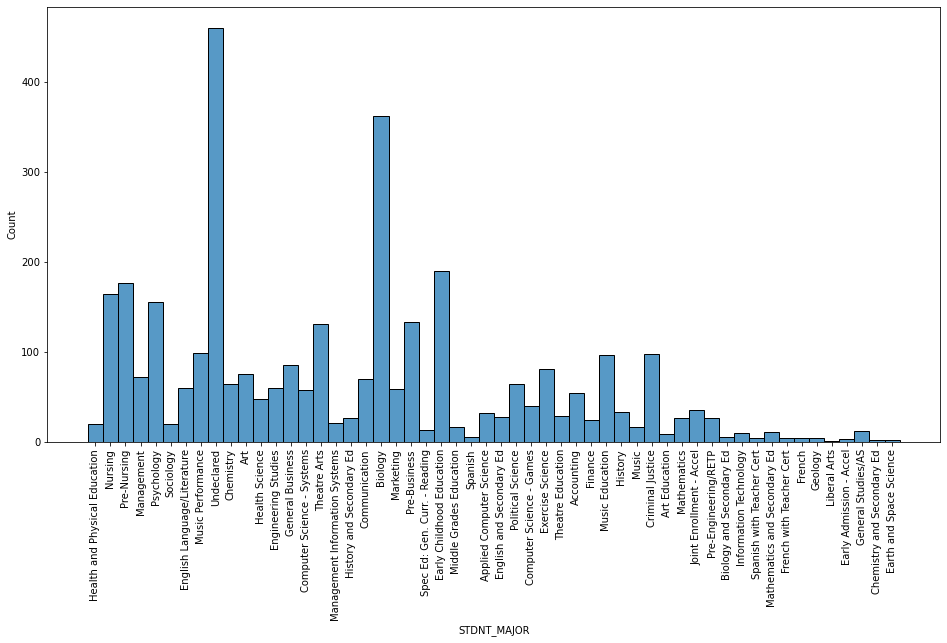

In [130]:
plt.figure(figsize=(16,8))
sns.histplot(df['STDNT_MAJOR'])
plt.xticks(rotation = 90)
plt.show()

##### Conclusion : 

Looking at this data I come to a conclusion that Data is well distributed.

#### 9. HOUSING_STS

In [143]:
# checked Student Representation Based on Hounsing Status

df.HOUSING_STS.value_counts(normalize=True)

Off Campus    0.582647
On Campus     0.417353
Name: HOUSING_STS, dtype: float64

In [144]:
pd.crosstab(df.HOUSING_STS,df.Attrition)

RETURNED_2ND_YR,0,1
HOUSING_STS,,
Off Campus,389,1592
On Campus,334,1085


##### Conclusion : 

Find No NaN, 58% is having Off Campus Housing.

#### 10. DISTANCE_FROM_HOME

In [150]:
df[df.Attrition == 1].DISTANCE_FROM_HOME.describe()

count    2662.000000
mean       96.506762
std       235.583832
min         0.000000
25%        69.000000
50%        69.000000
75%       138.000000
max      5932.000000
Name: DISTANCE_FROM_HOME, dtype: float64

In [152]:
df[df.Attrition == 0].DISTANCE_FROM_HOME.describe()

count     713.000000
mean      112.214586
std       233.494713
min         0.000000
25%        69.000000
50%        69.000000
75%       138.000000
max      4501.000000
Name: DISTANCE_FROM_HOME, dtype: float64

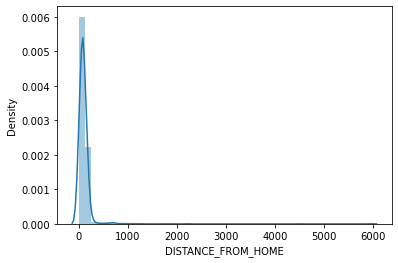

In [358]:
sns.distplot(df['DISTANCE_FROM_HOME']);

In [174]:
pd.crosstab(df.DISTANCE_FROM_HOME, df.Attrition)

RETURNED_2ND_YR,0,1
DISTANCE_FROM_HOME,,
0.0,128,543
59.0,8,45
69.0,266,1136
90.0,64,184
91.0,2,16
...,...,...
1854.0,1,0
2203.0,1,0
2221.0,1,0


##### Conclusion : 

1. Looking at this graph I found most of the student distence from home is between 0 to 600.

2. There are only 25 missing values.

3. As data is very much Skeawed but not able to find any trend in it of incresing Attirition based on distance.

4. So, on the basis of above conclusion will drop rows having NaN Values.

#### 11. HIGH_SCHL_GPA

In [180]:
df.HIGH_SCHL_GPA.nunique()

200

In [183]:
df.HIGH_SCHL_GPA.isna().sum()

53

In [189]:
df.HIGH_SCHL_GPA.describe()

count    3347.000000
mean        3.202738
std         0.455337
min         0.000000
25%         2.870000
50%         3.200000
75%         3.560000
max         4.000000
Name: HIGH_SCHL_GPA, dtype: float64

In [178]:
pd.crosstab(df.HIGH_SCHL_GPA,df.Attrition)

RETURNED_2ND_YR,0,1
HIGH_SCHL_GPA,,
0.00,1,0
1.87,0,1
1.92,0,1
1.94,0,1
2.00,2,8
...,...,...
3.94,1,10
3.95,0,1
3.96,2,6


In [191]:
df["HIGH_SCHL_GPA"].fillna(0,inplace = True)

In [192]:
df.HIGH_SCHL_GPA.isna().sum()

0

##### Conclusion : 

As find 53 null value , not able to find accurate trend so imputing value with 0 considering 53 student were absent at the time of exam.

#### 12. HIGH_SCHL_NAME

In [195]:
df.HIGH_SCHL_NAME.nunique()

439

In [196]:
df.HIGH_SCHL_NAME.head()

STUDENT IDENTIFIER
7755837    SCHOOL 130
7755888    SCHOOL 130
7755911    SCHOOL 286
7755980    SCHOOL 109
7756046     SCHOOL 46
Name: HIGH_SCHL_NAME, dtype: object

In [194]:
df.HIGH_SCHL_NAME.isna().sum()

1

##### Conclusion : 

HIGH_SCHL_NAME is Categorical data having 439 unique values. which is of high Cardinality. So, droping it from the Dataframe.

#### 13.     
#### FATHER_HI_EDU_CD
#### FATHER_HI_EDU_DESC
#### MOTHER_HI_EDU_CD
#### MOTHER_HI_EDU_DESC
#### DEGREE_GROUP_DESC
#### DEGREE_GROUP_CD

In [220]:
df.FATHER_HI_EDU_CD.isna().sum()

0

In [231]:
df[["DEGREE_GROUP_DESC", "DEGREE_GROUP_CD"]].value_counts()

DEGREE_GROUP_DESC  DEGREE_GROUP_CD
Bachelors          B                  3384
Associate          A                    12
Career Associate   V                     4
dtype: int64

In [234]:
df[["FATHER_HI_EDU_DESC","FATHER_HI_EDU_CD"]].value_counts()

FATHER_HI_EDU_CD  FATHER_HI_EDU_DESC       
2.0               High School                  1336
3.0               College/Beyond               1309
0.0               No Information                432
4.0               Other/Unknown                 226
1.0               Middle School/Junior High      97
dtype: int64

In [235]:
df[["MOTHER_HI_EDU_DESC","MOTHER_HI_EDU_CD",]].value_counts()

MOTHER_HI_EDU_DESC         MOTHER_HI_EDU_CD
College/Beyond             3.0                 1500
High School                2.0                 1223
Other/Unknown              4.0                  117
Middle School/Junior High  1.0                   71
dtype: int64

In [211]:
df.FATHER_HI_EDU_CD.unique()

array([2., 3., 4., 0., 1.])

In [212]:
df.FATHER_HI_EDU_DESC.value_counts()

High School                  1336
College/Beyond               1309
No Information                432
Other/Unknown                 226
Middle School/Junior High      97
Name: FATHER_HI_EDU_DESC, dtype: int64

In [219]:
df["FATHER_HI_EDU_CD"].fillna(0,inplace = True)

In [218]:
df.FATHER_HI_EDU_CD


STUDENT IDENTIFIER
7755837    2.0
7755888    3.0
7755911    3.0
7755980    2.0
7756046    3.0
          ... 
8036665    0.0
8036667    0.0
8036848    2.0
8037074    0.0
8037098    2.0
Name: FATHER_HI_EDU_CD, Length: 3400, dtype: float64

In [217]:
df.FATHER_HI_EDU_DESC


STUDENT IDENTIFIER
7755837       High School
7755888    College/Beyond
7755911    College/Beyond
7755980       High School
7756046    College/Beyond
                ...      
8036665    No Information
8036667    No Information
8036848       High School
8037074    No Information
8037098       High School
Name: FATHER_HI_EDU_DESC, Length: 3400, dtype: object

In [247]:
df.MOTHER_HI_EDU_CD


STUDENT IDENTIFIER
7755837    3.0
7755888    3.0
7755911    2.0
7755980    2.0
7756046    2.0
          ... 
8036665    NaN
8036667    NaN
8036848    2.0
8037074    NaN
8037098    3.0
Name: MOTHER_HI_EDU_CD, Length: 3400, dtype: float64

##### Conclusion : 

found

#### 14.   FIND MULTICOLINEARITY

In [311]:
Corr = df.select_dtypes("number").corr()

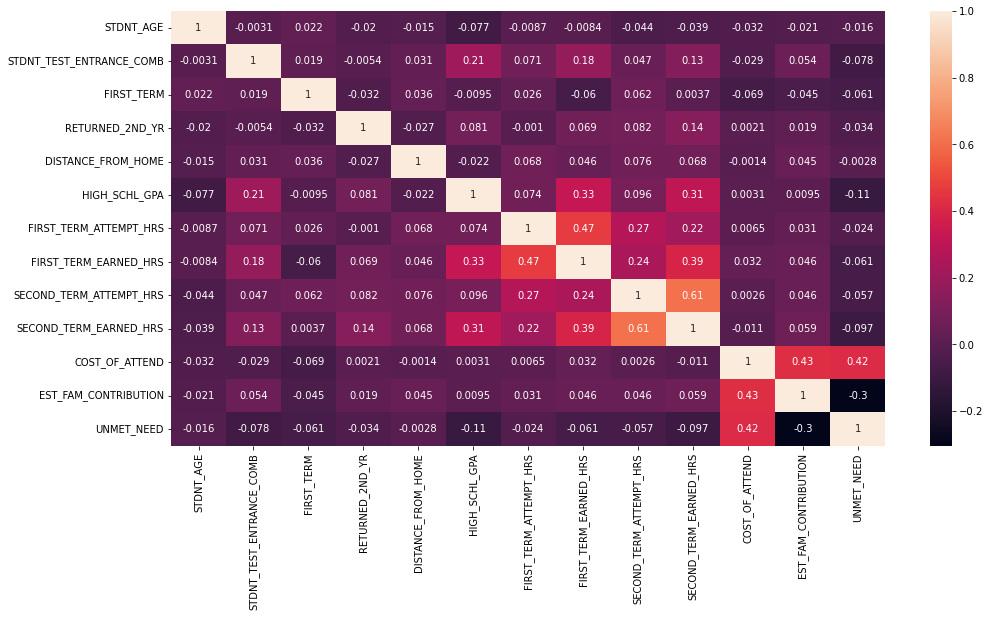

In [312]:
plt.figure(figsize= (16,8))
sns.heatmap(Corr, annot = True)
plt.show()

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3400 entries, 7755837 to 8037098
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STDNT_AGE                 3400 non-null   int64  
 1   STDNT_GENDER              3400 non-null   object 
 2   STDNT_BACKGROUND          3400 non-null   object 
 3   IN_STATE_FLAG             3400 non-null   object 
 4   INTERNATIONAL_STS         3400 non-null   object 
 5   STDNT_MAJOR               3400 non-null   object 
 6   STDNT_TEST_ENTRANCE_COMB  2882 non-null   float64
 7   FIRST_TERM                3400 non-null   int64  
 8   CORE_COURSE_NAME_1_F      3400 non-null   object 
 9   CORE_COURSE_GRADE_1_F     3400 non-null   object 
 10  CORE_COURSE_NAME_2_F      3301 non-null   object 
 11  CORE_COURSE_GRADE_2_F     3301 non-null   object 
 12  CORE_COURSE_NAME_3_F      2835 non-null   object 
 13  CORE_COURSE_GRADE_3_F     2835 non-null   object 
 14 

##### Conclusion : 

Droped Column With high Multicolinearity
"FATHER_HI_EDU_DESC","MOTHER_HI_EDU_DESC","DEGREE_GROUP_DESC","STDNT_TEST_ENTRANCE1","STDNT_TEST_ENTRANCE2","GROSS_FIN_NEED","SECOND_TERM"

#### 15. Check Cardinality

In [326]:
df.select_dtypes("object").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3400 entries, 7755837 to 8037098
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   STDNT_GENDER           3400 non-null   object
 1   STDNT_BACKGROUND       3400 non-null   object
 2   IN_STATE_FLAG          3400 non-null   object
 3   INTERNATIONAL_STS      3400 non-null   object
 4   STDNT_MAJOR            3400 non-null   object
 5   CORE_COURSE_GRADE_1_F  3400 non-null   object
 6   CORE_COURSE_GRADE_2_F  3301 non-null   object
 7   CORE_COURSE_GRADE_3_F  2835 non-null   object
 8   CORE_COURSE_GRADE_4_F  1803 non-null   object
 9   CORE_COURSE_GRADE_1_S  3168 non-null   object
 10  CORE_COURSE_GRADE_2_S  2961 non-null   object
 11  CORE_COURSE_GRADE_3_S  2362 non-null   object
 12  HOUSING_STS            3400 non-null   object
 13  DEGREE_GROUP_CD        3400 non-null   object
dtypes: object(14)
memory usage: 398.4+ KB


In [327]:
df.select_dtypes("object").nunique().sort_values()

STDNT_GENDER              2
IN_STATE_FLAG             2
INTERNATIONAL_STS         2
HOUSING_STS               2
DEGREE_GROUP_CD           3
CORE_COURSE_GRADE_3_F     6
CORE_COURSE_GRADE_4_F     6
CORE_COURSE_GRADE_2_S     6
CORE_COURSE_GRADE_3_S     6
CORE_COURSE_GRADE_1_F     7
CORE_COURSE_GRADE_2_F     7
STDNT_BACKGROUND          8
CORE_COURSE_GRADE_1_S     8
STDNT_MAJOR              54
dtype: int64

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3400 entries, 7755837 to 8037098
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STDNT_AGE                 3400 non-null   int64  
 1   STDNT_GENDER              3400 non-null   object 
 2   STDNT_BACKGROUND          3400 non-null   object 
 3   IN_STATE_FLAG             3400 non-null   object 
 4   INTERNATIONAL_STS         3400 non-null   object 
 5   STDNT_MAJOR               3400 non-null   object 
 6   STDNT_TEST_ENTRANCE_COMB  2882 non-null   float64
 7   FIRST_TERM                3400 non-null   int64  
 8   HOUSING_STS               3400 non-null   object 
 9   RETURNED_2ND_YR           3400 non-null   int64  
 10  DISTANCE_FROM_HOME        3375 non-null   float64
 11  HIGH_SCHL_GPA             3347 non-null   float64
 12  DEGREE_GROUP_CD           3400 non-null   object 
 13  FIRST_TERM_ATTEMPT_HRS    3400 non-null   int64  
 14 

#### CONCLUSION : 
Droping column with high cardinality.

## split

In [158]:
# vertical split

target = "Attrition"
# Target Vector
y = df[target]

# Feature Metrix
X = df.drop(columns= "Attrition")

# horizontal split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
y.shape

(3400,)

In [160]:
y

STUDENT IDENTIFIER
7755837    0
7755888    1
7755911    1
7755980    1
7756046    0
          ..
8036665    0
8036667    0
8036848    0
8037074    0
8037098    0
Name: Attrition, Length: 3400, dtype: int64

In [162]:
X.shape

(3400, 18)

In [164]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2720, 18)
(680, 18)
(2720,)
(680,)


## Baseline

In [165]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.7801


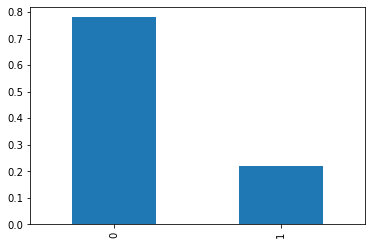

In [166]:
y_train.value_counts(normalize=True).plot(kind = "bar");

## Iterate

#### Logistic Regression

In [167]:
# Build model Logistic Regression
model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    LogisticRegression()
)
# Fit model to training data
model_lr.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['STDNT_GENDER', 'STDNT_BACKGROUND',
                                     'IN_STATE_FLAG', 'INTERNATIONAL_STS',
                                     'STDNT_MAJOR', 'HOUSING_STS',
                                     'DEGREE_GROUP_CD'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('logisticregression', LogisticRegression())])

#### Decision Tree Classifier

In [168]:
# Build model DecisionTreeClassifier
model_dt = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(max_depth=4,random_state=42)
)
# Fit model to training data
model_dt.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['STDNT_GENDER', 'STDNT_BACKGROUND',
                                      'IN_STATE_FLAG', 'INTERNATIONAL_STS',
                                      'STDNT_MAJOR', 'HOUSING_STS',
                                      'DEGREE_GROUP_CD'],
                                mapping=[{'col': 'STDNT_GENDER',
                                          'data_type': dtype('O'),
                                          'mapping': F      1
M      2
NaN   -2
dtype: int64},
                                         {'col': 'STDNT_BACKGROUND',
                                          'data_type': dtype('O'),
                                          'mapping': BGD 1    1
BGD 7    2
BGD 3    3
BGD 6    4
BGD 4    5
BGD 2    6
BGD...
Geology                           51
French                            52
Chemistry and Secondary Ed        53
NaN                               -2
dtype: int64},
                                     

#### Random Forest Classifier

In [169]:
## Pipeline buildding # Classifier

clf = make_pipeline(OrdinalEncoder(),SimpleImputer(),RandomForestClassifier(random_state=42))
print(clf)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [170]:
# cross-validation for Classsifier

cv_acc_scores = cross_val_score(clf, X_train, y_train, cv = 5, n_jobs=-1)
print(cv_acc_scores)

[0.82720588 0.80330882 0.81066176 0.80514706 0.81617647]


In [171]:
# the range of hyperparameters

params = {
    "simpleimputer__strategy": ["mean", "median"],
    "randomforestclassifier__n_estimators": range(25,100,25),
    "randomforestclassifier__max_depth": range(10,50,10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [172]:
# Created a GridSearchCV named model that includes out classifier and hyperparameter grid

model_rf = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model_rf

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [173]:
# Train model
model_rf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [174]:
# Extracted the cross-validation results from model and loaded them into a DataFrame named cv_results

In [175]:
type(model_rf.cv_results_)

dict

In [176]:
cv_results = pd.DataFrame(model_rf.cv_results_)
cv_results.head(25).sort_values("rank_test_score")


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.270529,0.010535,0.022717,0.002716,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.827206,0.805147,0.819853,0.812500,0.808824,0.814706,0.007919,1
10,0.368780,0.017635,0.027126,0.003228,20,75,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.827206,0.806985,0.818015,0.805147,0.816176,0.814706,0.008004,1
4,0.371405,0.016912,0.034057,0.012845,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.812500,0.814338,0.816176,0.799632,0.816176,0.811765,0.006217,3
22,0.373660,0.049931,0.029056,0.007877,40,75,mean,"{'randomforestclassifier__max_depth': 40, 'ran...",0.825368,0.799632,0.812500,0.806985,0.814338,0.811765,0.008512,4
2,0.224361,0.019587,0.021962,0.002328,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.816176,0.814338,0.814338,0.806985,0.805147,0.811397,0.004442,5
16,0.349450,0.020365,0.026412,0.003099,30,75,mean,"{'randomforestclassifier__max_depth': 30, 'ran...",0.825368,0.801471,0.810662,0.805147,0.814338,0.811397,0.008270,5
14,0.259915,0.014887,0.019751,0.000794,30,50,mean,"{'randomforestclassifier__max_depth': 30, 'ran...",0.818015,0.799632,0.818015,0.805147,0.801471,0.808456,0.008004,7
6,0.172200,0.020056,0.015850,0.001087,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.821691,0.799632,0.819853,0.805147,0.794118,0.808088,0.010943,8
18,0.135398,0.007590,0.015676,0.000648,40,25,mean,"{'randomforestclassifier__max_depth': 40, 'ran...",0.821691,0.792279,0.816176,0.814338,0.794118,0.807721,0.012116,9
20,0.225101,0.003844,0.019153,0.000546,40,50,mean,"{'randomforestclassifier__max_depth': 40, 'ran...",0.818015,0.795956,0.818015,0.803309,0.801471,0.807353,0.009035,10


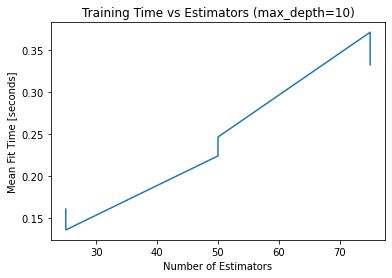

In [177]:
# Create mask
mask = cv_results["param_randomforestclassifier__max_depth"] == 10
# Plot fit time vs n_estimators
plt.plot( cv_results[mask]["param_randomforestclassifier__n_estimators"],
         cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

In [178]:
cv_results[mask][["mean_fit_time", "param_randomforestclassifier__max_depth", "param_simpleimputer__strategy"]]

,mean_fit_time,param_randomforestclassifier__max_depth,param_simpleimputer__strategy
0,0.161048,10,mean
1,0.136388,10,median
2,0.224361,10,mean
3,0.246848,10,median
4,0.371405,10,mean
5,0.332750,10,median


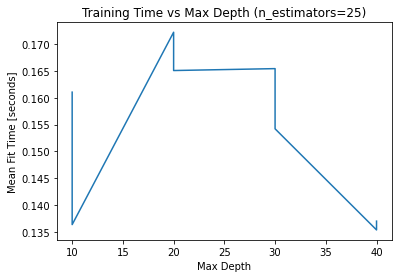

In [179]:
# Create mask
mask = cv_results["param_randomforestclassifier__n_estimators"] == 25
# Plot fit time vs max_depth
plt.plot(
    cv_results[mask]["param_randomforestclassifier__max_depth"],
    cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

In [180]:
# Extract best hyperparameters
model_rf.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Evaluate

#### Linear Regression accuracy score

In [181]:
acc_train_lr = accuracy_score(y_train, model_lr.predict(X_train))
acc_test_lr = model_lr.score(X_test, y_test)

print("Training Accuracy lr:", round(acc_train_lr, 2))
print("Test Accuracy lr:", round(acc_test_lr, 2))

Training Accuracy lr: 0.78
Test Accuracy lr: 0.82


#### Decision tree accuracy score

In [182]:
#acc_train = accuracy_score(y_train, model_dt.predict(X_train))
acc_train_dt = model_dt.score(X_train, y_train)
acc_test_dt = model_dt.score(X_test, y_test)

print("Training Accuracy dt:", round(acc_train_dt, 2))
print("Test Accuracy dt:", round(acc_test_dt, 2))

Training Accuracy dt: 0.84
Test Accuracy dt: 0.84


In [183]:
tree_depth = model_dt.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 4


In [184]:
depth_hyperparams = range(1,10,2)

In [185]:
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = make_pipeline(
        OrdinalEncoder(),
        SimpleImputer(),
        DecisionTreeClassifier(max_depth=d,random_state=42)
        )
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train,y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_test,y_test))

print("Training Accuracy Scores:", training_acc[:10])
print("Validation Accuracy Scores:", validation_acc[:10])

Training Accuracy Scores: [0.7801470588235294, 0.8290441176470589, 0.8400735294117647, 0.8525735294117647, 0.8742647058823529]
Validation Accuracy Scores: [0.8161764705882353, 0.8470588235294118, 0.8352941176470589, 0.8176470588235294, 0.8]


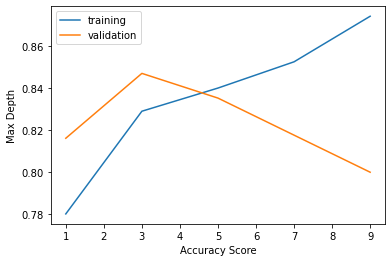

In [186]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams,training_acc, label = "training")
plt.plot(depth_hyperparams,validation_acc, label = "validation")
plt.xlabel("Accuracy Score")
plt.ylabel("Max Depth")
plt.legend();

#### RANDOM FOREST model performs

In [187]:
acc_train = model_rf.score(X_train,y_train)
acc_test = model_rf.score(X_test,y_test)
print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9923
Test Accuracy: 0.8412


In [188]:
y_test.value_counts()

0    555
1    125
Name: Attrition, dtype: int64

In [189]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_rf, X_test,y_test);

## Communication

#### Logestic Regression Result

In [190]:
model_lr.predict(X_train)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [191]:
y_train_pred_proba_lr = model_lr.predict_proba(X_train)
print(y_train_pred_proba_lr[:5])

[[0.82261282 0.17738718]
 [0.77479466 0.22520534]
 [0.77500985 0.22499015]
 [0.81646143 0.18353857]
 [0.77982957 0.22017043]]


In [192]:
features_lr = model_lr.named_steps["onehotencoder"].get_feature_names()
importances_lr = model_lr.named_steps["logisticregression"].coef_[0]

In [193]:
# Created a pandas Series named odds_ratios, where the index is features and the values are our the exponential of the importances

feat_imp_lr = pd.Series((importances_lr ), index=features_lr ).sort_values()
feat_imp_lr.head()

SECOND_TERM                -6.150034e-06
COST_OF_ATTEND             -1.198734e-07
STDNT_TEST_ENTRANCE_COMB   -3.037563e-08
EST_FAM_CONTRIBUTION       -5.962555e-09
STDNT_AGE                  -5.495717e-10
dtype: float64

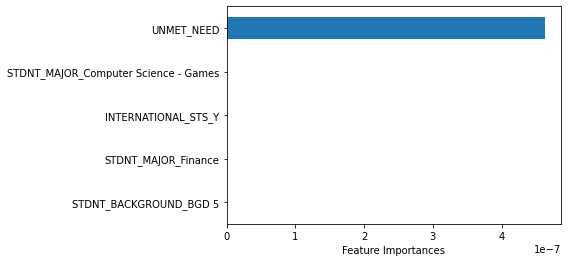

In [194]:
# Horizontal bar chart, five largest coefficients
feat_imp_lr.tail(5).plot(kind = "barh")
plt.xlabel("Feature Importances");

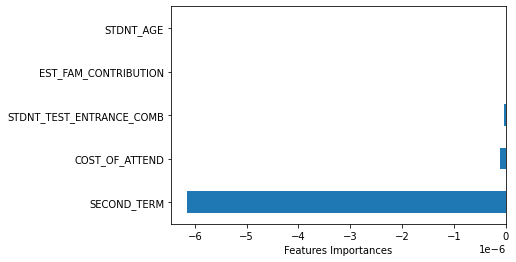

In [195]:
# Horizontal bar chart, five smallest coefficients
feat_imp_lr.head(5).plot(kind = "barh")
plt.xlabel("Features Importances");

#### Decision Tree Classifier Result

In [196]:
features_dt = X_train.columns
importances_dt = model_dt.named_steps["decisiontreeclassifier"].feature_importances_

print("Features_dt:", features_dt[:3])
print("Importances_dt:", importances_dt[:3])

Features_dt: Index(['STDNT_AGE', 'STDNT_GENDER', 'STDNT_BACKGROUND'], dtype='object')
Importances_dt: [0.01076728 0.         0.        ]


In [197]:
feat_imp_dt = pd.Series(importances_dt, index=features_dt).sort_values()
feat_imp_dt.head()

HOUSING_STS          0.0
STDNT_GENDER         0.0
STDNT_BACKGROUND     0.0
IN_STATE_FLAG        0.0
INTERNATIONAL_STS    0.0
dtype: float64

In [198]:
feat_imp_dt.sum()

1.0

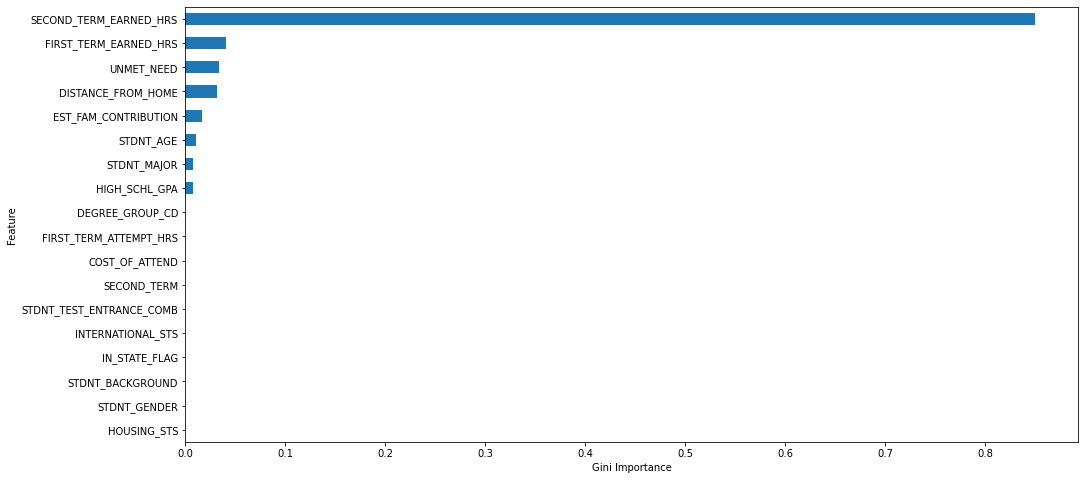

In [199]:
# Create horizontal bar chart
plt.figure(figsize=(16,8))
feat_imp_dt.plot(kind = "barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.show()

#### Random Forest Result

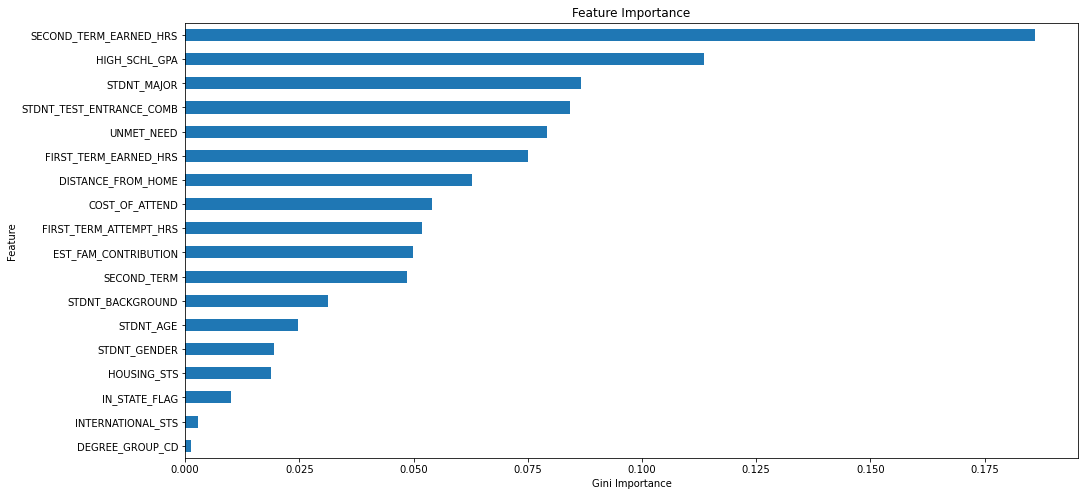

In [202]:
# Get feature names from training data
features_rf = X_train.columns
# Extract importances from model
importances_rf = model_rf.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
# Create a series with feature names and importances
feat_imp_rf = pd.Series(importances_rf, index=features_rf).sort_values()
# Plot 10 most important features
plt.figure(figsize=(16,8))
feat_imp_rf.plot(kind = "barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

### Conclusion : 
    
##### It look like Random Forest is one of the best model to predict attrition rate.

Training Accuracy: 0.9923

Test Accuracy: 0.8412


##### Decision tree Accuracy

Training Accuracy dt: 0.84

Test Accuracy dt: 0.84

##### Logestic Regression

Training Accuracy lr: 0.78

Test Accuracy lr: 0.82

# Business Questions: Leverage data on student demographic profile, course preferences, performance record, grades, financial background, financial aid and other application information to:

## 1. Identify key drivers of early student attrition

### Answer
#### Feature 1 : SECOND_TERM_EARNED_HRS
#### Feature 2 : HIGH_SCHL_GPA
#### Feature 3 : STDNT_MAJOR
#### Feature 4 : STDNT_TEST_ENTRANCE_COMB
#### Feature 5 : UNMET_NEED
#### Feature 6 : FIRST_TERM_EARNED_HRS


## 2. Build a predictive model to identify students with higher early attrition risk

### Build model DecisionTreeClassifier
model_dt = make_pipeline(

    OneHotEncoder(use_cat_names=True),
    
    SimpleImputer(),
    
    DecisionTreeClassifier(max_depth=4,random_state=42)
    
)

### Build model Logistic Regression
model_lr = make_pipeline(
    
    OneHotEncoder(use_cat_names=True),
    
    SimpleImputer(),
    
    LogisticRegression()

)


### Build model Random Forest 
Created a GridSearchCV named model that includes out classifier and hyperparameter grid



clf = make_pipeline(OrdinalEncoder(),SimpleImputer(),RandomForestClassifier(random_state=42))

params = {

    "simpleimputer__strategy": ["mean", "median"],
    
    "randomforestclassifier__n_estimators": range(25,100,25),
    
    "randomforestclassifier__max_depth": range(10,50,10)

}

model_rf = GridSearchCV(

    clf,
    
    param_grid=params,
    
    cv=5,
    
    n_jobs=-1,
    
    verbose=1

)


## 3. Recommend appropriate interventions based on the analysis

### Recomendations : 


#### 1. # Grade points earned by Student in Second & First semester could be increased by providing extra refresher classes.

#### 2. Focus On Student's High School GPA score.

#### 3. Student's Major course in University should be given priority.

#### 4. Student's score calculated both on Entrance1 & Entrance2 score.

#### 5. Unmet financial need of the student could be fulfilled by providing some kind of financial aid.
